# Line Chart

This section showcases the line chart. It contains examples of how to create line charts using the [datachart.charts.LineChart](datachart.charts.LineChart) function.

The examples sequentially build on each other, going from simple to more complex.

As mentioned above, the line charts are created using the `LineChart` function found in the [datachart.charts](datachart.charts) module. Let's import it:

In [1]:
from datachart.charts import LineChart

<div class="admonition note">
    <p class="admonition-title">Double figure generation avoidence</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        To avoid double figure generation, the <code>LineChart</code> function is preceded by the <code>_ =</code> operator. The double figures are generated because <code>LineChart</code> returns the <code>plt.Figure</code> object, which is then used to save the figure locally.
    </p>
</div>

## Line Chart Input Attributes

The `LineChart` function accepts the attributes of the [datachart.typings.LineChartAttrs](/references/typings/#datachart.typings.LineChartAttrs) type. In a nutshell, the input is a `dict` object containing the `charts` attribute, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "data": [{                                            # A list of line data points
    "x":    Union[int, float],                          # The x-axis value
    "y":    Union[int, float],                          # The y-axis value
    "yerr": Optional[Union[int, float]]                 # The y-axis error value (to plot the confidence interval)
  }],
  "style": {                                            # The style of the line (optional)
    "plot_line_color":     Optional[str],               # The color of the line (hex color code)
    "plot_line_style":     Optional[LINE_STYLE],        # The line style (solid, dashed, etc.)
    "plot_line_marker":    Optional[LINE_MARKER],       # The marker style of the line (circle, square, etc.)
    "plot_line_width":     Optional[float],             # The width of the line
    "plot_line_alpha":     Optional[float],             # The alpha of the line (how visible the line is)
    "plot_line_drawstyle": Optional[LINE_DRAW_STYLE],   # The drawstyle of the line (step, steps-mid, etc.)
    "plot_line_zorder":    Optional[int],               # The zorder of the line
  },
  "subtitle": Optional[str],                            # The title of the chart
  "xlabel":   Optional[str],                            # The x-axis label
  "ylabel":   Optional[str],                            # The y-axis label

  "xticks": Optional[List[Union[int, float]]],          # the x-axis ticks
  "xticklabels": Optional[List[Union[str, float, str]], # the x-axis tick labels (must be same length as xticks)
  "xtickrotate": Optional[int],                         # the x-axis tick labels rotation
  "yticks": Optional[List[Union[int, float]]],          # the y-axis ticks
  "yticklabels": Optional[List[Union[str, float, str]], # the y-axis tick labels (must be same length as yticks)
  "ytickrotate": Optional[int],                         # the y-axis tick labels rotation

  "vlines": Optional[Union[dict, None]],                # the vertical lines (see below for more details)
  "hlines": Optional[Union[dict, None]],                # the horizontal lines (see below for more details)
}
```

For more details, see the [datachart.typings.LineChartAttrs](/references/typings/#datachart.typings.LineChartAttrs) type.

## Single Line Chart

In this part, we show how to create a single line chart using the `LineChart` function. 

Let us first import the necessary libraries:

In [2]:
import numpy as np

**Basic example.** Let us first create a basic line chart showing the cosine function. 

The following example shows how only the `charts["data"]` attribute is required to draw the line chart.

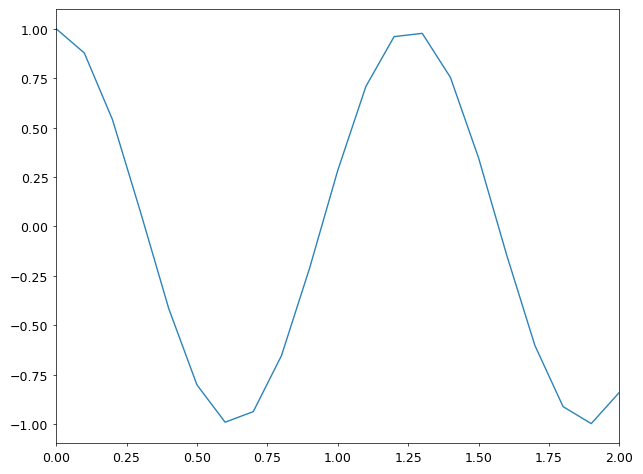

In [3]:
_ = LineChart(
    {
        # add the data to the chart
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        }
    }
)

### Chart title and axis labels

To add the chart title and axis labels, simply add the `title`, `xlabel` and `ylabel` attributes.

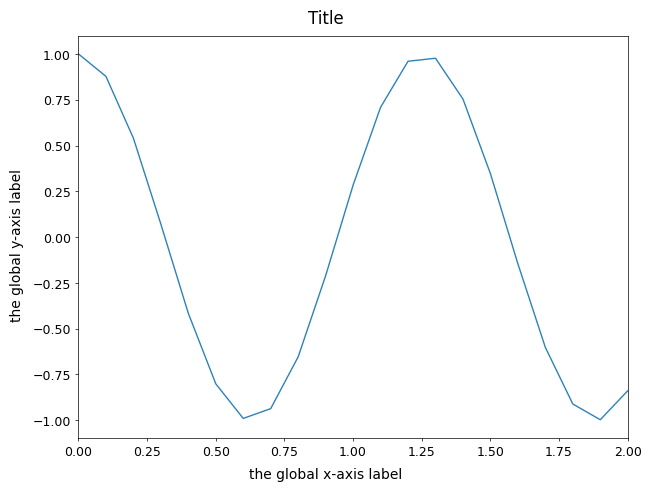

In [4]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },
        # add the title
        "title": "Title",
        # add the x and y axis labels
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
    }
)

### Figure size and grid

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. The `datachart` package provides a [datachart.constants.FIG_SIZE](/references/constants/#datachart.constants.FIG_SIZE) constant, which contains some of the predefined figure sizes.

To add the grid, simply add the `show_grid` attribute. The possible options are:

| Option | Description |
| --- | --- |
| `"both"` | shows both the x-axis and the y-axis gridlines. |
| `"x"` | shows only the x-axis grid lines. |
| `"y"` | shows only the y-axis grid lines. |

Again, `datachart` provides a [datachart.constants.SHOW_GRID](/references/constants/#datachart.constants.SHOW_GRID) constant, which contains the supported options.

In [5]:
from datachart.constants import FIG_SIZE, SHOW_GRID

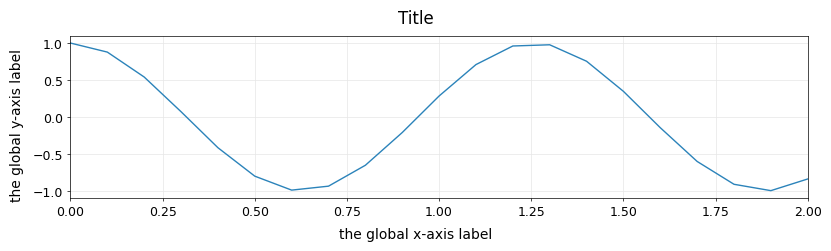

In [6]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        # add to determine the figure size
        "figsize": FIG_SIZE.A4_NARROW,
        # add to show the grid lines
        "show_grid": SHOW_GRID.BOTH,
    }
)

### Line style

To change a single line style simply add the `style` attribute with the corresponding attributes. The supported attributes are shown in the [datachart.typings.LineStyleAttrs](/references/typings/#datachart.typings.LineStyleAttrs) type, which contains the following attributes:

| Attribute              | Description |
| :--------------------- | :---------- |
| `"plot_line_color"`    | The color of the line (hex color code).              |
| `"plot_line_alpha"`    | The alpha of the line (how visible the line is).     |
| `"plot_line_width"`    | The width of the line.                               |
| `"plot_line_style"`    | The line style (solid, dashed, etc.).                |
| `"plot_line_marker"`   | The marker style of the line (circle, square, etc.). |
| `"plot_line_drawstyle"`| The drawstyle of the line (step, steps-mid, etc.).   |
| `"plot_line_zorder"`   | The zorder of the line.                              |

Again, to help with the style settings, the [datachart.constants](/references/constants/) module contains the following constants:

| Constant | Description |
| :------- | :---------- |
| [datachart.constants.LINE_STYLE](/references/constants/#datachart.constants.LINE_STYLE) | The line style (solid, dashed, etc.) |
| [datachart.constants.LINE_MARKER](/references/constants/#datachart.constants.LINE_MARKER) | The marker style of the line (circle, square, etc.) |
| [datachart.constants.LINE_DRAW_STYLE](/references/constants/#datachart.constants.LINE_DRAW_STYLE) | The drawstyle of the line (step, steps-mid, etc.) |

In [7]:
from datachart.constants import LINE_STYLE, LINE_MARKER, LINE_DRAW_STYLE

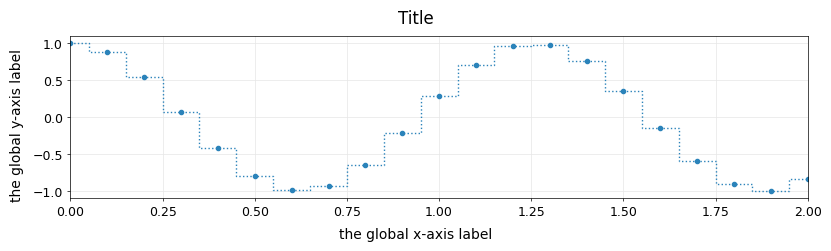

In [8]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            # define the style of the line
            "style": {
                "plot_line_style": LINE_STYLE.DOTTED,
                "plot_line_marker": LINE_MARKER.POINT,
                "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
    }
)

### Area under the line

To add the area under the line, simply add the `show_area` attribute into the input dictionary.

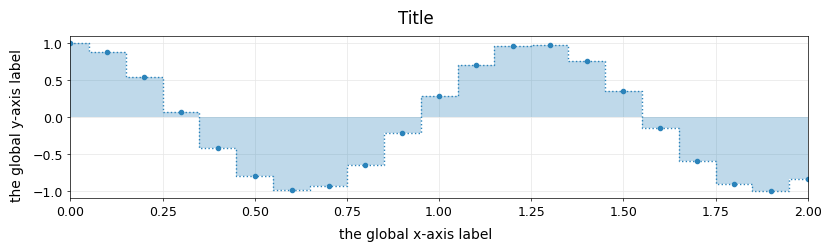

In [9]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            "style": {
                "plot_line_style": LINE_STYLE.DOTTED,
                "plot_line_marker": LINE_MARKER.POINT,
                "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
        # shows the area between the line and y=0
        "show_area": True,
    }
)

### Adding vertical and horizontal lines

**Adding vertical lines.** Within the `charts` attribute, define the attribute `vlines` with the [datachart.typings.VLinePlotAttrs](/references/typings/#datachart.typings.VLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "x":    Union[int, float],                  # The x-axis value
  "ymin": Optional[Union[int, float]],        # The minimum y-axis value
  "ymax": Optional[Union[int, float]],        # The maximum y-axis value
  "style": {                                  # The style of the line (optional)
    "plot_vline_color": Optional[str],        # The color of the line (hex color code)
    "plot_vline_style": Optional[LINE_STYLE], # The line style (solid, dashed, etc.)
    "plot_vline_width": Optional[float],      # The width of the line
    "plot_vline_alpha": Optional[float],      # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                     # The label of the line
}
```

**Adding horizontal lines.** Within the `charts` attribute, define the attribute `hlines`, with the [datachart.typings.HLinePlotAttrs](/references/typings/#datachart.typings.HLinePlotAttrs) typing, which is either a `dict` or a `List[dict]` where each dictionary contains some of the following attributes:

```python
{
  "y":    Union[int, float],                  # The y-axis value
  "xmin": Optional[Union[int, float]],        # The minimum x-axis value
  "xmax": Optional[Union[int, float]],        # The maximum x-axis value
  "style": {                                  # The style of the line (optional)
    "plot_hline_color": Optional[str],        # The color of the line (hex color code)
    "plot_hline_style": Optional[LINE_STYLE], # The line style (solid, dashed, etc.)
    "plot_hline_width": Optional[float],      # The width of the line
    "plot_hline_alpha": Optional[float],      # The alpha of the line (how visible the line is)
  },
  "label": Optional[str],                     # The label of the line
}
```


To add vertical and horizontal lines, simply add the `vlines` and `hlines` attributes into the input dictionary.

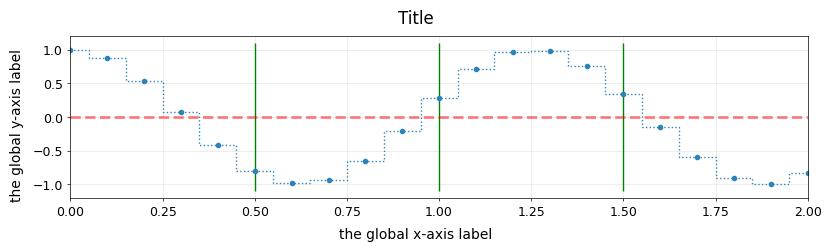

In [10]:
_ = LineChart(
    {
        "charts": {
            "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
            "style": {
                "plot_line_style": LINE_STYLE.DOTTED,
                "plot_line_marker": LINE_MARKER.POINT,
                "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
            },
            # add a list of vertical lines
            "vlines": [
                {
                    "x": 0.5 * i,
                    "style": {
                        "plot_vline_color": "green",
                        "plot_vline_style": LINE_STYLE.SOLID,
                        "plot_vline_width": 1,
                    },
                }
                for i in range(1, 4)
            ],
            # add a list of horizontal lines
            "hlines": {
                "y": 0,
                "style": {
                    "plot_hline_color": "red",
                    "plot_hline_style": LINE_STYLE.DASHED,
                    "plot_hline_width": 2,
                    "plot_hline_alpha": 0.5,
                },
            },
        },
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
    }
)

## Multiple line charts

To add multiple line charts, simply add the `charts` attribute with a list of charts, as shown below.

<div class="admonition note">
    <p class="admonition-title">Attributes same as creating a single chart</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        We designed the <code>datachart.charts.*</code> functions to use the same attribute naming when possible. To create multiple charts, the <code>charts</code> attribute becomes a list of dictionaries with the same attributes as when creating a single chart.
    </p>
</div>

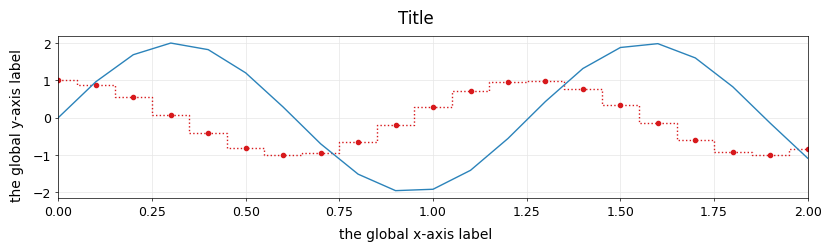

In [11]:
_ = LineChart(
    {
        # use a list of charts to define multiple lines
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_style": LINE_STYLE.DOTTED,
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
                },
            },
            {
                "data": [{"x": x / 10, "y": 2 * np.sin(x / 2)} for x in range(21)],
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
    }
)

### Sub-chart subtitles

We can name each chart by adding the `subtitle` attribute to each chart. In addition, to help with discerning which chart is which, use the `show_legend` attribute to show the legend of the charts.

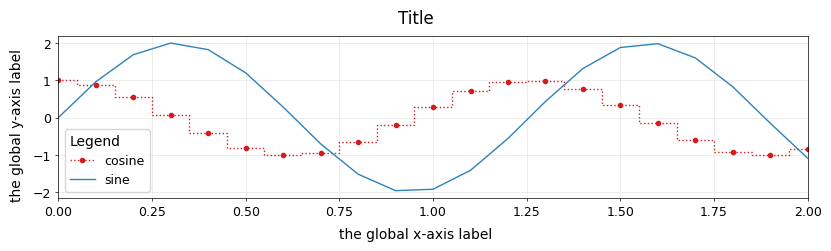

In [12]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_style": LINE_STYLE.DOTTED,
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
                },
                # add a subtitle to the line
                "subtitle": "cosine",
            },
            {
                "data": [{"x": x / 10, "y": 2 * np.sin(x / 2)} for x in range(21)],
                # add a subtitle to the line
                "subtitle": "sine",
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
        # show the legend
        "show_legend": True,
    }
)

### Subplots

To draw multiple charts in each subplot, simply add the `subplots` attribute. The chart's `subtitle` are then added at the top of each subplot, while the `title`, `xlabel` and `ylabel` are positioned to be global for all charts.

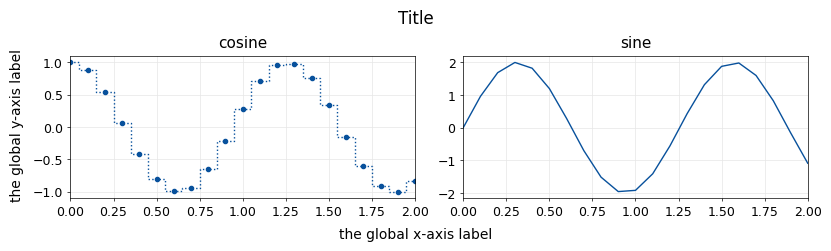

In [13]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_style": LINE_STYLE.DOTTED,
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
                },
                "subtitle": "cosine",
            },
            {
                "data": [{"x": x / 10, "y": 2 * np.sin(x / 2)} for x in range(21)],
                "subtitle": "sine",
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
        # show each chart in its own subplot
        "subplots": True,
    }
)

### Sharing x-axis and/or y-axis across subplots

To share the x-axis and/or y-axis across subplots, simply add the `sharex` and/or `sharey` attributes, which are boolean values that specify whether to share the axis across all subplots.

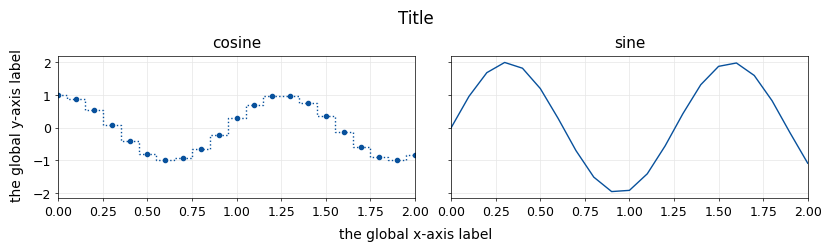

In [14]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_style": LINE_STYLE.DOTTED,
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
                },
                "subtitle": "cosine",
            },
            {
                "data": [{"x": x / 10, "y": 2 * np.sin(x / 2)} for x in range(21)],
                "subtitle": "sine",
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
        "subplots": True,
        # share the x-axis across all subplots
        "sharex": True,
        # share the y-axis across all subplots
        "sharey": True,
    }
)

### Area under the lines

Specifying the `show_area` attribute will show the area between the line and y=0 across all subplots.

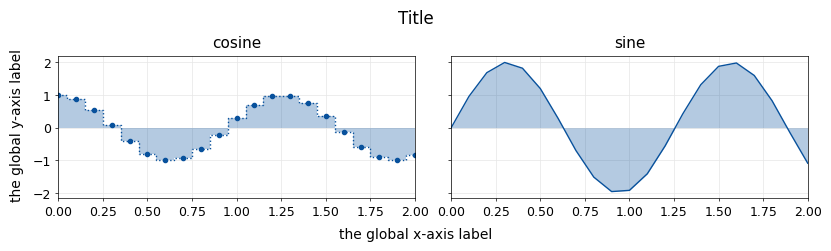

In [15]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [{"x": x / 10, "y": np.cos(x / 2)} for x in range(21)],
                "style": {
                    "plot_line_style": LINE_STYLE.DOTTED,
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
                },
                "subtitle": "cosine",
            },
            {
                "data": [{"x": x / 10, "y": 2 * np.sin(x / 2)} for x in range(21)],
                "subtitle": "sine",
            },
        ],
        "title": "Title",
        "xlabel": "the global x-axis label",
        "ylabel": "the global y-axis label",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
        "subplots": True,
        "sharex": True,
        "sharey": True,
        # show area between the line and y=0 for all subplots
        "show_area": True,
    }
)

### Confidence interval

If a line chart has a confidence interval, it can be added by adding the `yerr` attribute to the chart's `data` attribute. Afterwards, the `show_yerr` attribute can be set to `True` to show the confidence interval.

In [16]:
import random

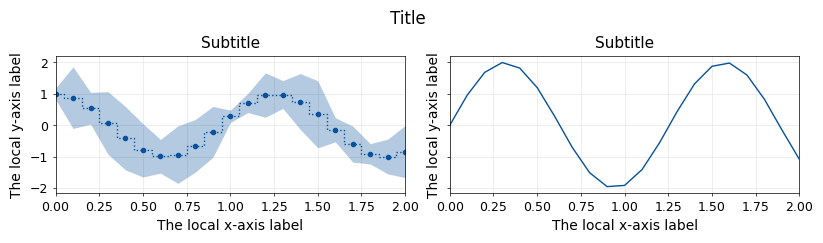

In [17]:
figure = LineChart(
    {
        "charts": [
            {
                "data": [
                    # add the error values for each point's y value
                    {"x": x / 10, "y": np.cos(x / 2), "yerr": 0.1 + random.random()}
                    for x in range(21)
                ],
                "style": {
                    "plot_line_style": LINE_STYLE.DOTTED,
                    "plot_line_marker": LINE_MARKER.POINT,
                    "plot_line_drawstyle": LINE_DRAW_STYLE.STEPS_MID,
                },
                "subtitle": "Subtitle",
                # add local subplot x-axis label
                "xlabel": "The local x-axis label",
                # add local subplot y-axis label
                "ylabel": "The local y-axis label",
            },
            {
                "data": [
                    # note: not all lines require to have the error values
                    {"x": x / 10, "y": 2 * np.sin(x / 2)}
                    for x in range(21)
                ],
                "subtitle": "Subtitle",
                # add local subplot x-axis label
                "xlabel": "The local x-axis label",
                # add local subplot y-axis label
                "ylabel": "The local y-axis label",
            },
        ],
        "title": "Title",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.BOTH,
        "subplots": True,
        "sharex": True,
        "sharey": True,
        # show the confidence interval using the error values
        "show_yerr": True,
    }
)

## Saving the chart as an image

To save the chart as an image, use the [datachart.utils.save_figure](/references/utils#datachart.utils.save_figure) function.

In [18]:
from datachart.utils import save_figure

In [19]:
save_figure(figure, "./fig_line_chart.png", dpi=300)

The figure should be saved in the current working directory.

## Example use cases

### Example 1: ROC curve

The example below shows how to create a ROC curve. 

<div class="admonition note">
    <p class="admonition-title"><code>data</code> attribute naming convention</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        By default, the <code>charts["data"]</code> items should be dictionaries with the following keys: <code>x</code>, <code>y</code>, <code>yerr</code>. However, they can be any other keys. In the example below, the <code>charts["data"]</code> contains the attributes <code>tp</code> and <code>fp</code>. To let the function know which values are which, you can specify the <code>x</code> and <code>y</code> attributes in the <code>charts</code> dictionary. This way, the function will know which value to use for the x- and y-axis.
    </p>
</div>

In [20]:
from datachart.constants import HATCH_STYLE

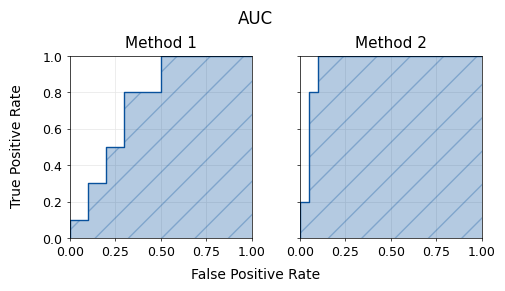

In [21]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [
                    # note that the attributes are "tp" and "fp", instead of "x" and "y"
                    {"tp": 0, "fp": 0},
                    {"tp": 0.1, "fp": 0},
                    {"tp": 0.1, "fp": 0.1},
                    {"tp": 0.3, "fp": 0.1},
                    {"tp": 0.3, "fp": 0.2},
                    {"tp": 0.5, "fp": 0.2},
                    {"tp": 0.5, "fp": 0.3},
                    {"tp": 0.8, "fp": 0.3},
                    {"tp": 0.8, "fp": 0.5},
                    {"tp": 1.0, "fp": 0.5},
                    {"tp": 1.0, "fp": 1.0},
                ],
                "subtitle": "Method 1",
                # specify which attr to use for x
                "x": "fp",
                # specify which attr to use for y
                "y": "tp",
                "style": {
                    "plot_area_hatch": HATCH_STYLE.DIAGONAL,
                },
            },
            {
                "data": [
                    # note that the attributes are "tp" and "fp", instead of "x" and "y"
                    {"tp": 0, "fp": 0},
                    {"tp": 0.2, "fp": 0},
                    {"tp": 0.2, "fp": 0.05},
                    {"tp": 0.8, "fp": 0.05},
                    {"tp": 0.8, "fp": 0.1},
                    {"tp": 1.0, "fp": 0.1},
                    {"tp": 1.0, "fp": 1.0},
                ],
                "subtitle": "Method 2",
                # specify which attr to use for x
                "x": "fp",
                # specify which attr to use for y
                "y": "tp",
                "style": {
                    "plot_area_hatch": HATCH_STYLE.DIAGONAL,
                },
            },
        ],
        "title": "AUC",
        "xlabel": "False Positive Rate",
        "ylabel": "True Positive Rate",
        "figsize": (5, 2.8),
        "show_grid": SHOW_GRID.BOTH,
        "xmin": 0,  # the minimum value of the x-axis
        "xmax": 1,  # the maximum value of the x-axis
        "ymin": 0,  # the minimum value of the y-axis
        "ymax": 1,  # the maximum value of the y-axis
        "show_area": True,
        "subplots": True,
        "sharex": True,
        "sharey": True,
        # assign the aspect ratio of all subplots
        "aspect_ratio": "equal",

    }
)

### Example 2: Training loss

The following example shows how to create a training loss chart. 

<div class="admonition note">
    <p class="admonition-title"><code>data</code> attribute naming convention</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        By default, the <code>charts["data"]</code> items should be dictionaries with the following keys: <code>x</code>, <code>y</code>, <code>yerr</code>. However, they can be any other keys. In the example below, the <code>charts["data"]</code> contains the attributes <code>step</code> and <code>loss</code>. To let the function know which values are which, you can specify the <code>x</code> and <code>y</code> attributes in the <code>charts</code> dictionary. This way, the function will know which value to use for the x- and y-axis.
    </p>
</div>

Let us first update the global config:

In [22]:
from datachart.constants import COLORS
from datachart.config import config

In [23]:
config.update_config(config={"color_general_multiple": COLORS.MixedDark})

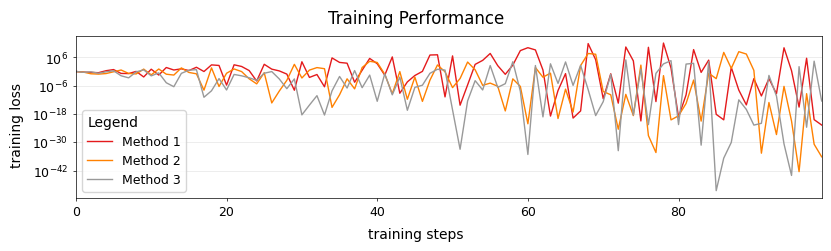

In [24]:
_ = LineChart(
    {
        "charts": [
            {
                "data": [
                    # note that the attributes are "step" and "loss", instead of "x" and "y"
                    {"step": step, "loss": (0.5 + random.random()) ** step}
                    for step in range(100)
                ],
                # specify which attr to use for x
                "x": "step",
                # specify which attr to use for y
                "y": "loss",
                "subtitle": "Method 1",
            },
            {
                "data": [
                    # note that the attributes are "step" and "loss", instead of "x" and "y"
                    {"step": step, "loss": (0.3 + random.random()) ** step}
                    for step in range(100)
                ],
                # specify which attr to use for x
                "x": "step",
                # specify which attr to use for y
                "y": "loss",
                "subtitle": "Method 2",
            },
            {
                "data": [
                    {"step": step, "loss": (0.2 + random.random()) ** step}
                    for step in range(100)
                ],
                # specify which attr to use for x
                "x": "step",
                # specify which attr to use for y
                "y": "loss",
                "subtitle": "Method 3",
            },
        ],
        "title": "Training Performance",
        "xlabel": "training steps",
        "ylabel": "training loss",
        "figsize": FIG_SIZE.A4_NARROW,
        "show_grid": SHOW_GRID.Y,
        "show_legend": True,
        # depict the y-axis as a log scale
        "log_scale": True,
        "subplots": False,
    }
)